In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns

# Checking if there are any categorical columns with missing values
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
data_1[numerical_columns] = scaler.fit_transform(data_1[numerical_columns])


# Defining Features and Target Variable
x_data_1 = data_1.drop(['id','stroke'], axis = 1)
y_data_1 = data_1['stroke']

print(data_1.info())

#splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB
None


Perceptron data 1 Data Accuracy: 0.923679060665362
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.33      0.26      0.29        62

    accuracy                           0.92      1022
   macro avg       0.64      0.61      0.63      1022
weighted avg       0.92      0.92      0.92      1022



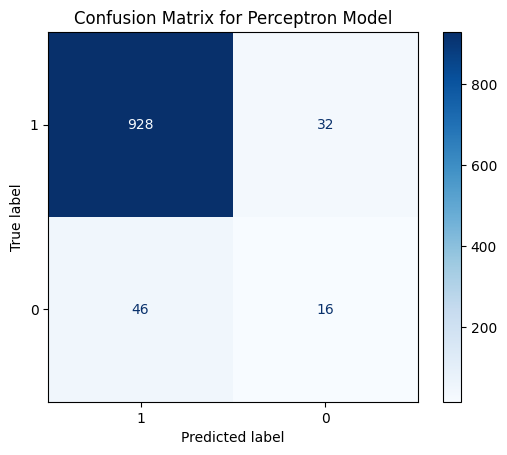

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

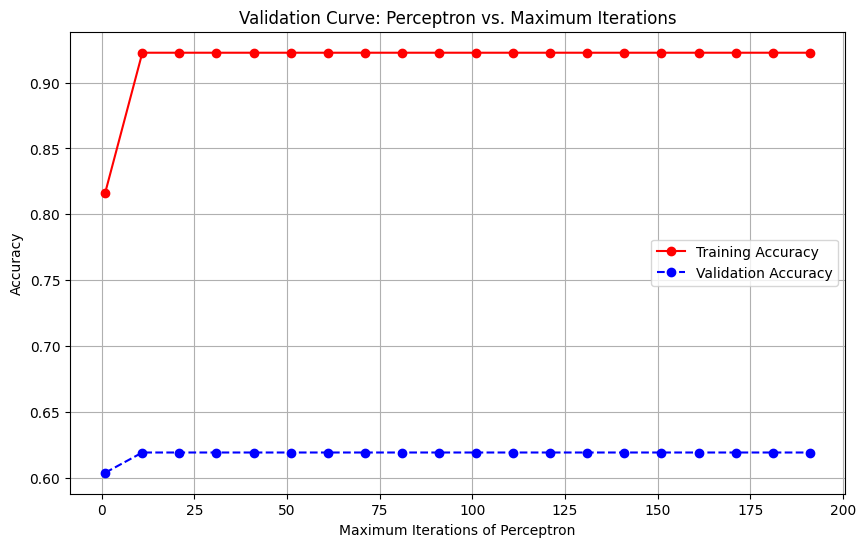

In [51]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Perceptron on dataset 1 with increased max_iter and class weighting
perceptron_model = Perceptron(max_iter=1000, class_weight='balanced', random_state=1)
perceptron_model.fit(X_data_1_train, y_data_1_train)
y_pred_data_1 = perceptron_model.predict(X_data_1_test)

# Print Results for dataset 1
print("Perceptron data 1 Data Accuracy:", accuracy_score(y_data_1_test, y_pred_data_1))
print(classification_report(y_data_1_test, y_pred_data_1))

# Confusion metrics for dataset 1
conf_matrix_perceptron = confusion_matrix(y_data_1_test, y_pred_data_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_perceptron, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Perceptron Model')
plt.show()

# Step 1: Define the range of maximum iterations to evaluate
iterations_range = range(1, 201, 10)  # Testing for 1 to 200 iterations

# Step 2: Calculate training and validation accuracies for different values of max iterations
train_scores = []
validation_scores = []

for max_iter in iterations_range:
    # Initialize Perceptron model with the current value of max iterations and class weighting
    perceptron = Perceptron(max_iter=max_iter, class_weight='balanced', random_state=1)

    # Calculate cross-validated training scores
    perceptron.fit(X_data_1_train, y_data_1_train)
    train_scores.append(perceptron.score(X_data_1_train, y_data_1_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(perceptron, X_data_1_train, y_data_1_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 3: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(iterations_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Iterations of Perceptron')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Perceptron vs. Maximum Iterations')
plt.legend(loc='best')
plt.grid()
plt.show()

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Defining Features and Target Variable
x_data_1 = data_encoded.drop(['id', 'stroke'], axis=1)
y_data_1 = data_encoded['stroke']

# Splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for Perceptron with class weight adjustment
param_grid_perceptron = {
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.001, 0.01, 0.1],  # Adjusted learning rates
    'class_weight': [None, 'balanced']  # Include balanced class weight
}

# Initialize and perform GridSearchCV for Perceptron
perceptron = Perceptron(random_state=42)
grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_perceptron.fit(X_data_1_train, y_data_1_train)

# Get the best parameters and evaluate on the test set
best_perceptron = grid_search_perceptron.best_estimator_
y_pred_best_perceptron = best_perceptron.predict(X_data_1_test)

# Evaluate the fine-tuned Perceptron model again
accuracy_best_perceptron = accuracy_score(y_data_1_test, y_pred_best_perceptron)
classification_rep_best_perceptron = classification_report(y_data_1_test, y_pred_best_perceptron)
best_params_perceptron = grid_search_perceptron.best_params_

# Display the best parameters and model performance
print("Best parameters for Perceptron:", best_params_perceptron)
print("Accuracy of the best Perceptron model:", accuracy_best_perceptron)
print("Classification report:\n", classification_rep_best_perceptron)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Perceptron: {'class_weight': None, 'eta0': 0.001, 'max_iter': 1000}
Accuracy of the best Perceptron model: 0.9158512720156555
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       960
           1       0.23      0.16      0.19        62

    accuracy                           0.92      1022
   macro avg       0.59      0.56      0.57      1022
weighted avg       0.90      0.92      0.91      1022



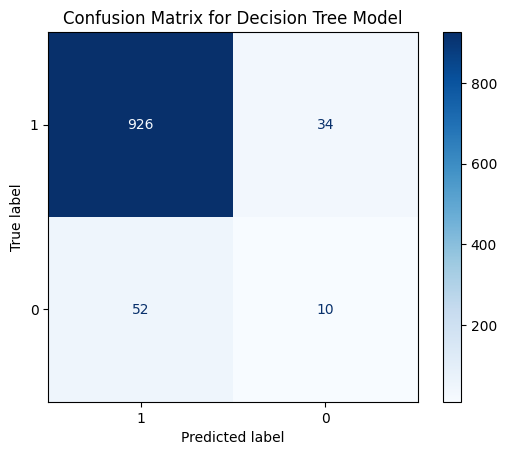

In [53]:
# Confusion metrics for dataset 1
conf_matrix_dt = confusion_matrix(y_data_1_test, y_pred_best_perceptron)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

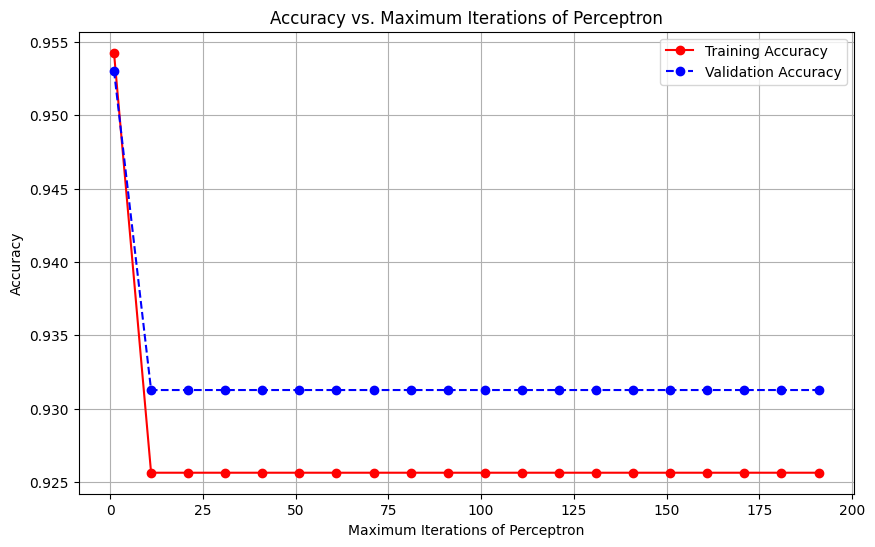

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Extract the best parameters from GridSearchCV
best_params = grid_search_perceptron.best_params_
best_eta0 = best_params['eta0']  # Learning rate
best_class_weight = best_params['class_weight']  # Class weight

# Step 2: Define the range of maximum iterations to evaluate
iterations_range = range(1, 201, 10)  # Adjusting the range for iterations

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different max_iter values
for max_iter in iterations_range:
    # Initialize Perceptron with the best eta0 and class weight
    perceptron = Perceptron(max_iter=max_iter,
                            eta0=best_eta0,
                            class_weight=best_class_weight,
                            random_state=42)

    # Train the model on the full training set
    perceptron.fit(X_data_1_train, y_data_1_train)

    # Calculate training accuracy
    train_acc = perceptron.score(X_data_1_train, y_data_1_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(perceptron, X_data_1_train, y_data_1_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. maximum iterations of the Perceptron
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(iterations_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Iterations of Perceptron')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Iterations of Perceptron')
plt.legend(loc='best')
plt.grid()
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')


# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany','InterviewScore',  'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis = 1)
y_data_2 = data_2['HiringDecision']

print(data_2.info())

#splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   float64
 7   SkillScore           1500 non-null   float64
 8   PersonalityScore     1500 non-null   float64
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 129.0 KB
None


Perceptron data 2 Data Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       215
           1       0.91      0.47      0.62        85

    accuracy                           0.84       300
   macro avg       0.87      0.73      0.76       300
weighted avg       0.85      0.84      0.82       300



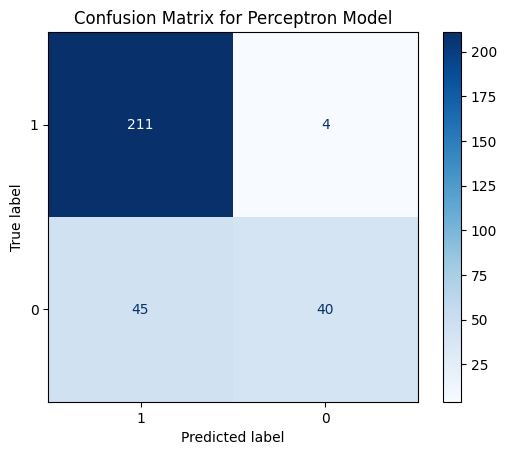

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

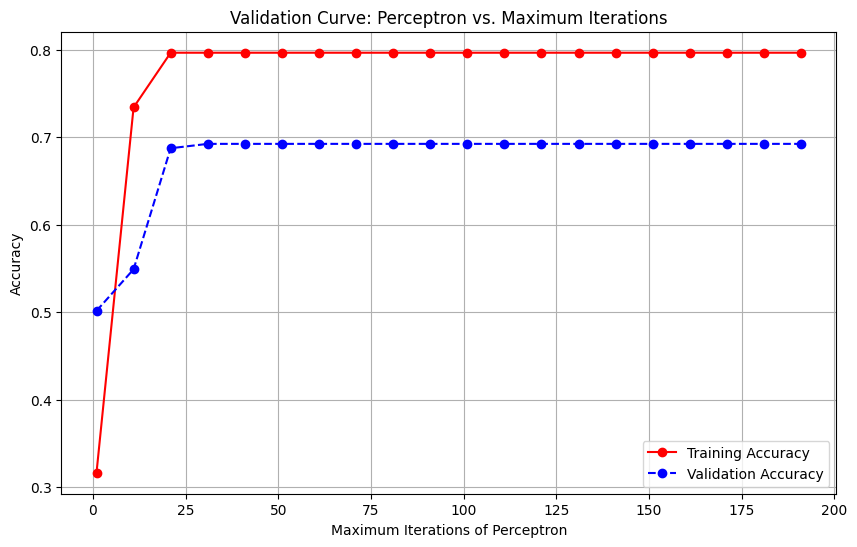

In [56]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Perceptron on dataset 2 with increased max_iter and class weighting
perceptron_model = Perceptron(max_iter=1000, class_weight='balanced', random_state=1)
perceptron_model.fit(X_data_2_train, y_data_2_train)
y_pred_data_2 = perceptron_model.predict(X_data_2_test)

# Print Results for dataset 2
print("Perceptron data 2 Data Accuracy:", accuracy_score(y_data_2_test, y_pred_data_2))
print(classification_report(y_data_2_test, y_pred_data_2))

# Confusion metrics for dataset 2
conf_matrix_perceptron = confusion_matrix(y_data_2_test, y_pred_data_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_perceptron, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Perceptron Model')
plt.show()

# Step 1: Define the range of maximum iterations to evaluate
iterations_range = range(1, 201, 10)  # Testing for 1 to 200 iterations

# Step 2: Calculate training and validation accuracies for different values of max iterations
train_scores = []
validation_scores = []

for max_iter in iterations_range:
    # Initialize Perceptron model with the current value of max iterations and class weighting
    perceptron = Perceptron(max_iter=max_iter, class_weight='balanced', random_state=1)

    # Calculate cross-validated training scores
    perceptron.fit(X_data_2_train, y_data_2_train)
    train_scores.append(perceptron.score(X_data_2_train, y_data_2_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(perceptron, X_data_2_train, y_data_2_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 3: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(iterations_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Iterations of Perceptron')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Perceptron vs. Maximum Iterations')
plt.legend(loc='best')
plt.grid()
plt.show()

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')


# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany','InterviewScore',  'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis = 1)
y_data_2 = data_2['HiringDecision']

#print(data_2.info())

#splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for Perceptron
param_grid_perceptron = {
    'max_iter': [1000, 2000, 3000, 5000],  # Expanded maximum iterations
    'eta0': [0.001, 0.01, 0.1, 1.0, 10.0],  # Broader range of learning rates
    'class_weight': [None, 'balanced'],  # Class weight options
    'tol': [1e-3, 1e-4]  # Tolerance for convergence
}

# Step 6: Initialize and perform GridSearchCV for Perceptron
perceptron = Perceptron(random_state=42)
grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_perceptron.fit(X_data_2_train, y_data_2_train)

# Get the best parameters and evaluate on the test set
best_perceptron = grid_search_perceptron.best_estimator_
y_pred_best_perceptron = best_perceptron.predict(X_data_2_test)

# Evaluate the fine-tuned Perceptron model
accuracy_best_perceptron = accuracy_score(y_data_2_test, y_pred_best_perceptron)
classification_rep_best_perceptron = classification_report(y_data_2_test, y_pred_best_perceptron)
best_params_perceptron = grid_search_perceptron.best_params_

# Display the best parameters and model performance
print("Best parameters for Perceptron:", best_params_perceptron)
print("Accuracy of the best Perceptron model:", accuracy_best_perceptron)
print("Classification report:\n", classification_rep_best_perceptron)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best parameters for Perceptron: {'class_weight': 'balanced', 'eta0': 0.001, 'max_iter': 1000, 'tol': 0.0001}
Accuracy of the best Perceptron model: 0.2966666666666667
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       215
           1       0.29      1.00      0.45        85

    accuracy                           0.30       300
   macro avg       0.64      0.51      0.24       300
weighted avg       0.80      0.30      0.15       300



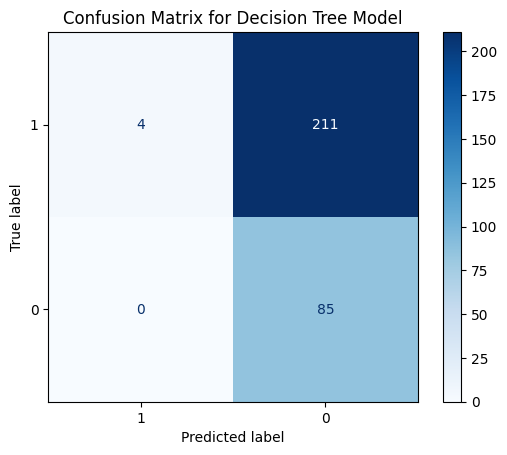

In [58]:
# Confusion metrics for dataset 2
conf_matrix_dt = confusion_matrix(y_data_2_test, y_pred_best_perceptron)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

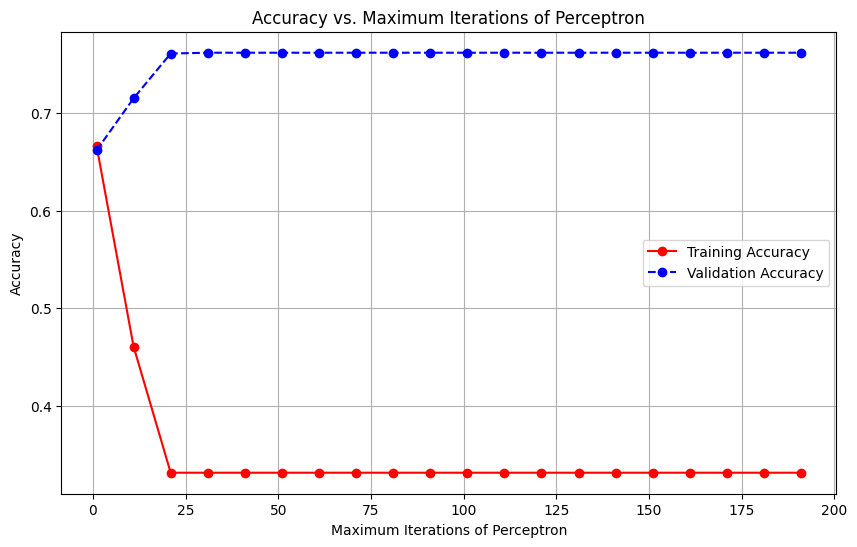

In [59]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Extract the best parameters from GridSearchCV
best_params = grid_search_perceptron.best_params_
best_eta0 = best_params['eta0']  # Learning rate
best_class_weight = best_params['class_weight']  # Class weight

# Step 2: Define the range of maximum iterations to evaluate
iterations_range = range(1, 201, 10)  # Adjusting the range for iterations

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different max_iter values
for max_iter in iterations_range:
    # Initialize Perceptron with the best eta0 and class weight
    perceptron = Perceptron(max_iter=max_iter,
                            eta0=best_eta0,
                            class_weight=best_class_weight,
                            random_state=42)

    # Train the model on the full training set
    perceptron.fit(X_data_2_train, y_data_2_train)

    # Calculate training accuracy
    train_acc = perceptron.score(X_data_2_train, y_data_2_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(perceptron, X_data_2_train, y_data_2_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. maximum iterations of the Perceptron
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(iterations_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Maximum Iterations of Perceptron')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Iterations of Perceptron')
plt.legend(loc='best')
plt.grid()
plt.show()
